#Mounting the Google Drive in the runtime's virtual machine
mount with the google drive so that google colab can acccess the file in google drive

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


#Import library to unzip the file
unzip the file and save in a temporary directory

In [2]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Birds/Train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

local_zip = '/content/drive/MyDrive/Birds/Test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
TrainPath = '/tmp/Train'
TestPath = '/tmp/Test'

In [4]:
train_fnames = os.listdir(TrainPath)
print(train_fnames[:10])

test_fnames = os.listdir(TestPath)
print(test_fnames[:10])


['Heermann_Gull_0023_2673090326.jpg', 'Ruby_throated_Hummingbird_0016_2546812108.jpg', 'Common_Raven_0001_2908483490.jpg', 'Slaty_backed_Gull_0024_424398955.jpg', 'Olive_sided_Flycatcher_0015_2464757872.jpg', 'Pomarine_Jaeger_0001_633585761.jpg', 'Le_Conte_Sparrow_0028_428244372.jpg', 'Rufous_Hummingbird_0031_2432568137.jpg', 'Cerulean_Warbler_0015_2512980662.jpg', 'Laysan_Albatross_0011_2783435831.jpg']
['0068.jpg', '0167.jpg', '0423.jpg', '1186.jpg', '0360.jpg', '0378.jpg', '0829.jpg', '0209.jpg', '0475.jpg', '0324.jpg']


In [5]:
print('total training images:', len(train_fnames))
print('total testing images:', len(test_fnames))

total training images: 4829
total testing images: 1204


In [6]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
import os
from pathlib import Path

#from here it start to separate the filename with same label into same directory
def organizeImages(txtFile):
    # open txt file
    f = open(txtFile, "r")

    # List to store lists [fileName, label]
    fileList = []
    
    # loop all line in file & store in fileList array
    for line in f:
        #split the filepath into filename and label
        line_splited = line.split(" ")
        #and store it into fileList
        fileList.append([line_splited[0].strip(), line_splited[1].rstrip()])

    # close file
    f.close()

    # change working directory 
    if txtFile == "/content/drive/MyDrive/Birds/train.txt":
      os.chdir('/tmp/Train')

    else:
      os.chdir('/tmp/Test')

    for fileName, label in fileList:
        for file in os.scandir():
          #read the filename and convert to string
            fName = str(Path(file))
  
            if (fileName == fName):
              #the directory path is equal to the label
                directoryPath = Path(label)
                #if the directoryPath is not the same as previous, create a new directory
                if directoryPath.is_dir() != True:
                    directoryPath.mkdir()
                filePath = Path(file)
                filePath.rename(directoryPath.joinpath(filePath))
                print("Moved: " + fName)
                continue
    
    print("Finished.")

In [8]:
train_txt = '/content/drive/MyDrive/Birds/train.txt'
test_txt = '/content/drive/MyDrive/Birds/test.txt'

organizeImages(train_txt)
organizeImages(test_txt)

Streaming output truncated to the last 5000 lines.
Moved: Frigatebird_0009_160029217.jpg
Moved: Frigatebird_0012_331403867.jpg
Moved: Frigatebird_0007_1478401761.jpg
Moved: Frigatebird_0008_938530666.jpg
Moved: Frigatebird_0018_2876055327.jpg
Moved: Frigatebird_0010_2632633868.jpg
Moved: Frigatebird_0020_1479238152.jpg
Moved: Frigatebird_0005_271062043.jpg
Moved: Frigatebird_0002_2483363870.jpg
Moved: Frigatebird_0001_2846955695.jpg
Moved: Frigatebird_0013_223221931.jpg
Moved: Northern_Fulmar_0028_409849707.jpg
Moved: Northern_Fulmar_0005_2517464477.jpg
Moved: Northern_Fulmar_0025_2841209829.jpg
Moved: Northern_Fulmar_0007_2517464695.jpg
Moved: Northern_Fulmar_0026_413770047.jpg
Moved: Northern_Fulmar_0004_1393774680.jpg
Moved: Northern_Fulmar_0018_2707368242.jpg
Moved: Northern_Fulmar_0022_2596698954.jpg
Moved: Northern_Fulmar_0002_2758082365.jpg
Moved: Northern_Fulmar_0027_429087843.jpg
Moved: Northern_Fulmar_0010_2236891087.jpg
Moved: Northern_Fulmar_0016_2787660415.jpg
Moved: North

In [9]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

#read the TrainPath to train_dataset
train_dataset = image_dataset_from_directory(TrainPath,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 4829 files belonging to 200 classes.


In [10]:
#read the TestPath to validation_dataset
#the validation_dataset is the test image dataset
validation_dataset = image_dataset_from_directory(TestPath,
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 1204 files belonging to 200 classes.


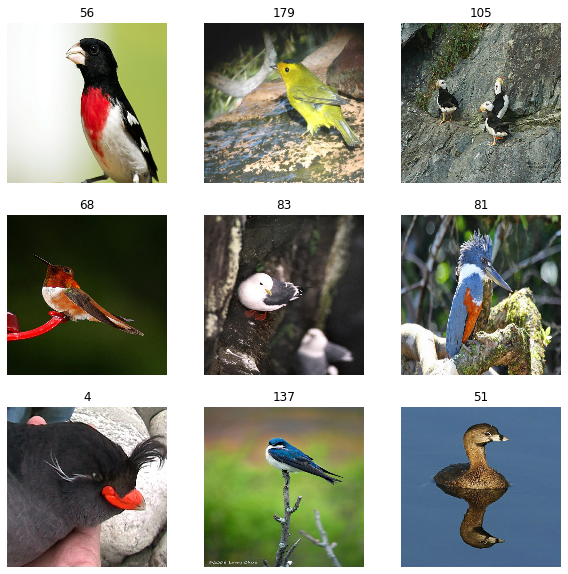

In [11]:
#set the class name, which is the label name
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
#Use buffered prefetching to load images from disk without having I/O become blocking.
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [13]:
#add some noise to training dataset, such as flip and rotate the images
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

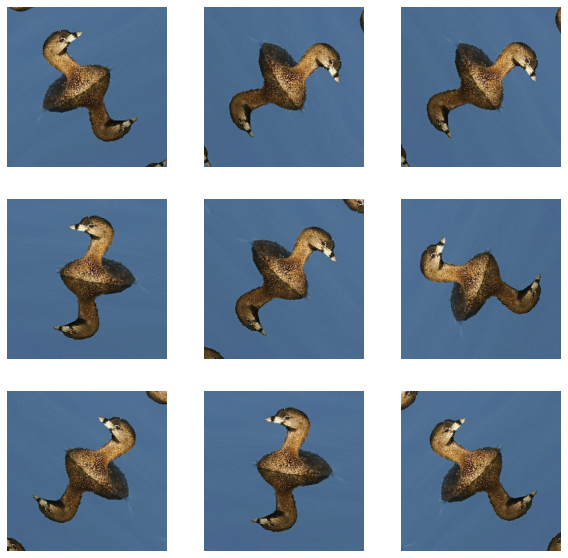

In [14]:
#show the image after rotating and flip
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [15]:
#Here is to import the MobileNet V2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [16]:
#MobileNet V2 expects the pixel values in [-1,1], but our image is [0,255]
#Here is to rescale the image to fit the MobileNet V2
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [17]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [18]:
#This feature extractor converts each 160x160x3 image into a 5x5x1280 block of features
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [19]:
#Freeze the convolutional layer
base_model.trainable = False

In [20]:
#See the summary of the pre-trained model MobileNetv2
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [21]:
#Here use the GlobalAverageProoling2D layer to convert the feature into 1280-vector per image
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [22]:
#Dense set to 200 because we got 200 classes to predict
prediction_layer = tf.keras.layers.Dense(200)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 200)


In [23]:
#build a model that include all the previous feature extractor
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [24]:
base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [26]:
#the trainable variables is weights and biases
len(model.trainable_variables)

2

In [27]:
#Here show the initial performance
initial_epochs = 50

loss, accuracy = model.evaluate(validation_dataset)

38/38 [==============================] - 5s 95ms/step - loss: 12.0761 - sparse_categorical_accuracy: 0.0058


In [28]:
print("initial loss: {:.2f}".format(loss))
print("initial accuracy: {:.2f}".format(accuracy))

initial loss: 12.08
initial accuracy: 0.01


In [29]:
#Train the model
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/50
151/151 [==============================] - 21s 112ms/step - loss: 13.7272 - sparse_categorical_accuracy: 0.0122 - val_loss: 6.7894 - val_sparse_categorical_accuracy: 0.0241
Epoch 2/50
151/151 [==============================] - 17s 110ms/step - loss: 6.6911 - sparse_categorical_accuracy: 0.0193 - val_loss: 5.5830 - val_sparse_categorical_accuracy: 0.0233
Epoch 3/50
151/151 [==============================] - 17s 109ms/step - loss: 5.7995 - sparse_categorical_accuracy: 0.0176 - val_loss: 5.4443 - val_sparse_categorical_accuracy: 0.0266
Epoch 4/50
151/151 [==============================] - 17s 109ms/step - loss: 5.6007 - sparse_categorical_accuracy: 0.0184 - val_loss: 5.3574 - val_sparse_categorical_accuracy: 0.0233
Epoch 5/50
151/151 [==============================] - 17s 109ms/step - loss: 5.5015 - sparse_categorical_accuracy: 0.0172 - val_loss: 5.3428 - val_sparse_categorical_accuracy: 0.0191
Epoch 6/50
151/151 [==============================] - 17s 107ms/step - loss: 5.4571 

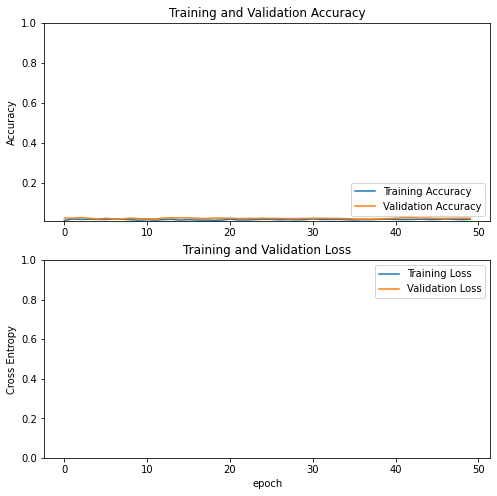

In [30]:
#Show the graph
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#Fine-tuning approach
Start from here, we use fine-tuninng approach

In [31]:
#Unfreeze the base model layers
base_model.trainable = True

In [32]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [33]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [34]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [35]:
len(model.trainable_variables)

56

In [36]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 50/60
151/151 [==============================] - 27s 126ms/step - loss: 5.3049 - sparse_categorical_accuracy: 0.0176 - val_loss: 5.2983 - val_sparse_categorical_accuracy: 0.0241
Epoch 51/60
151/151 [==============================] - 18s 118ms/step - loss: 5.2983 - sparse_categorical_accuracy: 0.0164 - val_loss: 5.2983 - val_sparse_categorical_accuracy: 0.0241
Epoch 52/60
151/151 [==============================] - 18s 119ms/step - loss: 5.3002 - sparse_categorical_accuracy: 0.0149 - val_loss: 5.2983 - val_sparse_categorical_accuracy: 0.0233
Epoch 53/60
151/151 [==============================] - 19s 119ms/step - loss: 5.2983 - sparse_categorical_accuracy: 0.0147 - val_loss: 5.2983 - val_sparse_categorical_accuracy: 0.0233
Epoch 54/60
151/151 [==============================] - 19s 121ms/step - loss: 5.2992 - sparse_categorical_accuracy: 0.0147 - val_loss: 5.2983 - val_sparse_categorical_accuracy: 0.0216
Epoch 55/60
151/151 [==============================] - 19s 122ms/step - loss: 5.

In [37]:
#Store the accuracy value and loss value
acc += history_fine.history['sparse_categorical_accuracy']
val_acc += history_fine.history['val_sparse_categorical_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

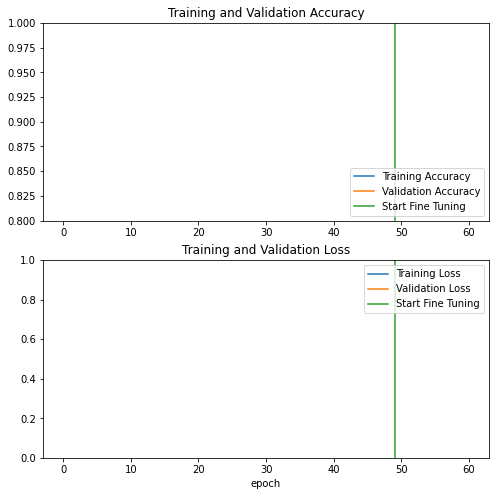

In [38]:
#Show the graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [39]:
#Use our test set to fit the model and get the performance
loss, accuracy = model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)

38/38 [==============================] - 3s 87ms/step - loss: 5.2939 - sparse_categorical_accuracy: 0.0257
Test accuracy : 0.02574750781059265


Predictions:
 [0 0 0 ... 0 0 0]
Labels:
 [0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 4 4 5 5 5]


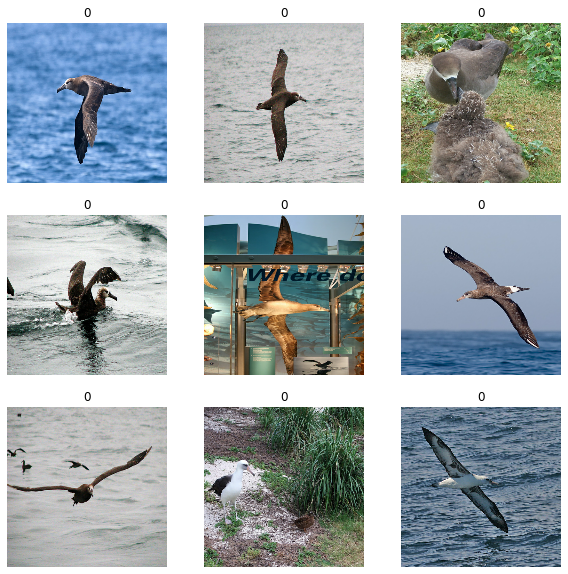

In [40]:
# Retrieve a batch of images from the test set
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a softmax for multi-class classification
predictions = tf.nn.softmax(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")